In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [2]:
df=pd.read_csv("gold_monthly_csv.csv")

In [3]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
df.isna().sum()

Date     0
Price    0
dtype: int64

In [5]:
df.shape

(847, 2)

finding starting date and ending date 

In [6]:
print("date range of gold prices availble from",df['Date'].sort_values(ascending=False)[0],'to',df['Date'].sort_values(ascending=False)[846])

date range of gold prices availble from 1950-01 to 2020-07


In [7]:
print(f"date range of gold prices available from - {df.loc[:,'Date'][0]}  to {df.loc[:,'Date'][len(df)-1]}")

date range of gold prices available from - 1950-01  to 2020-07


finding the date range between date 

In [8]:
date=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [9]:
date=pd.date_range(start="1/1/1950",end='8/1/2020',freq='M')

In [10]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [11]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index("month")
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [19]:
df.drop("month",axis=1,inplace=True)

In [20]:
df

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


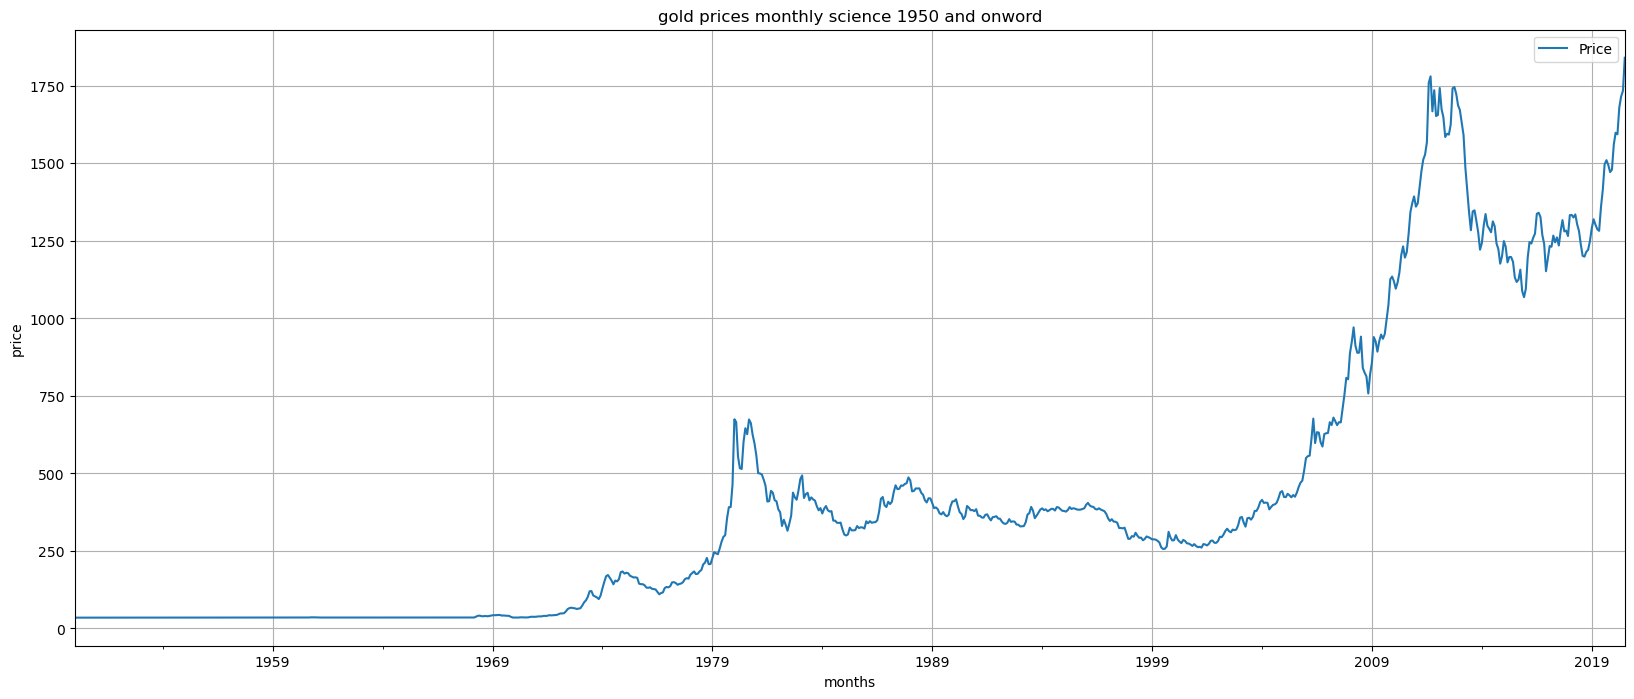

In [21]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly science 1950 and onword")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

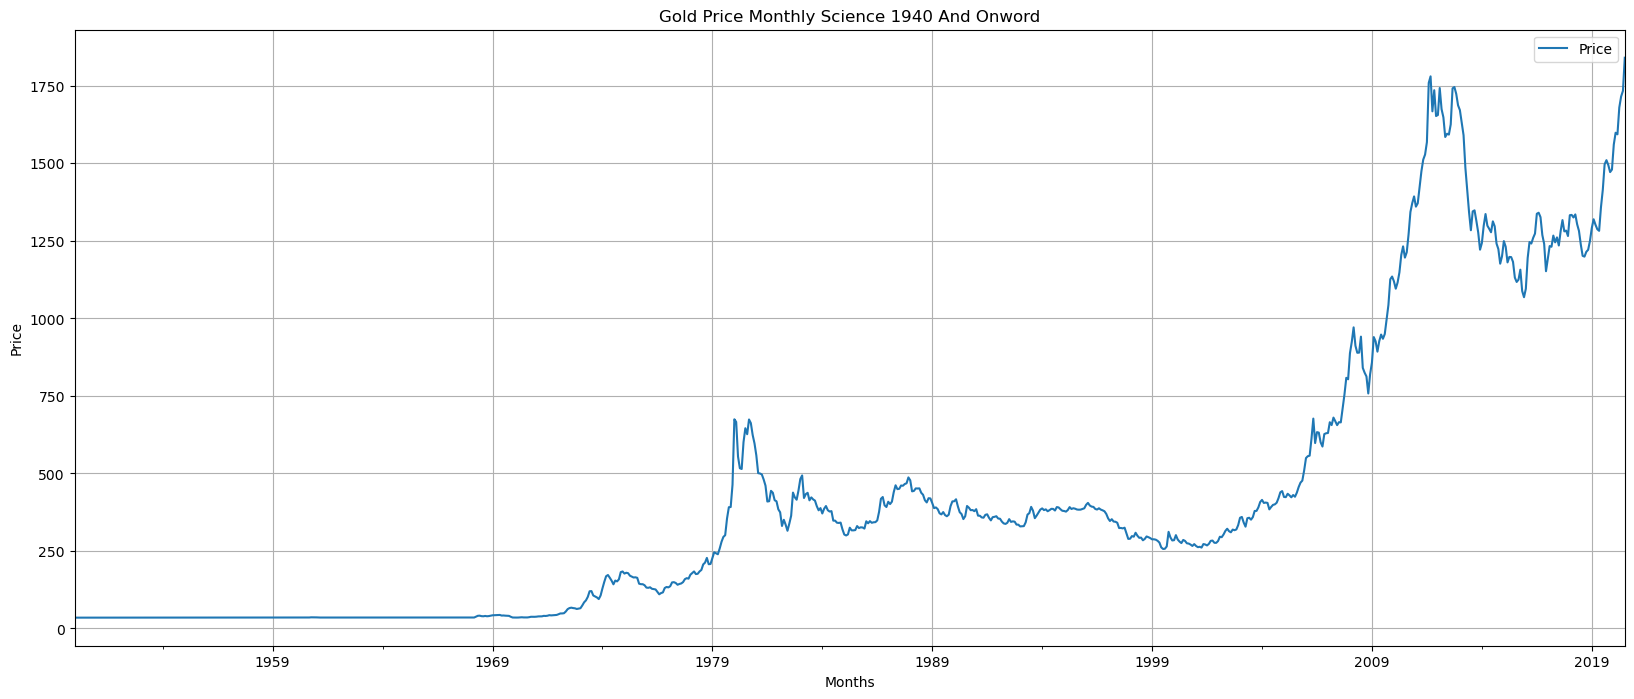

In [22]:
df.plot(figsize=(20,8))
plt.title("Gold Price Monthly Science 1940 And Onword")
plt.xlabel('Months')
plt.ylabel("Price")
plt.grid()

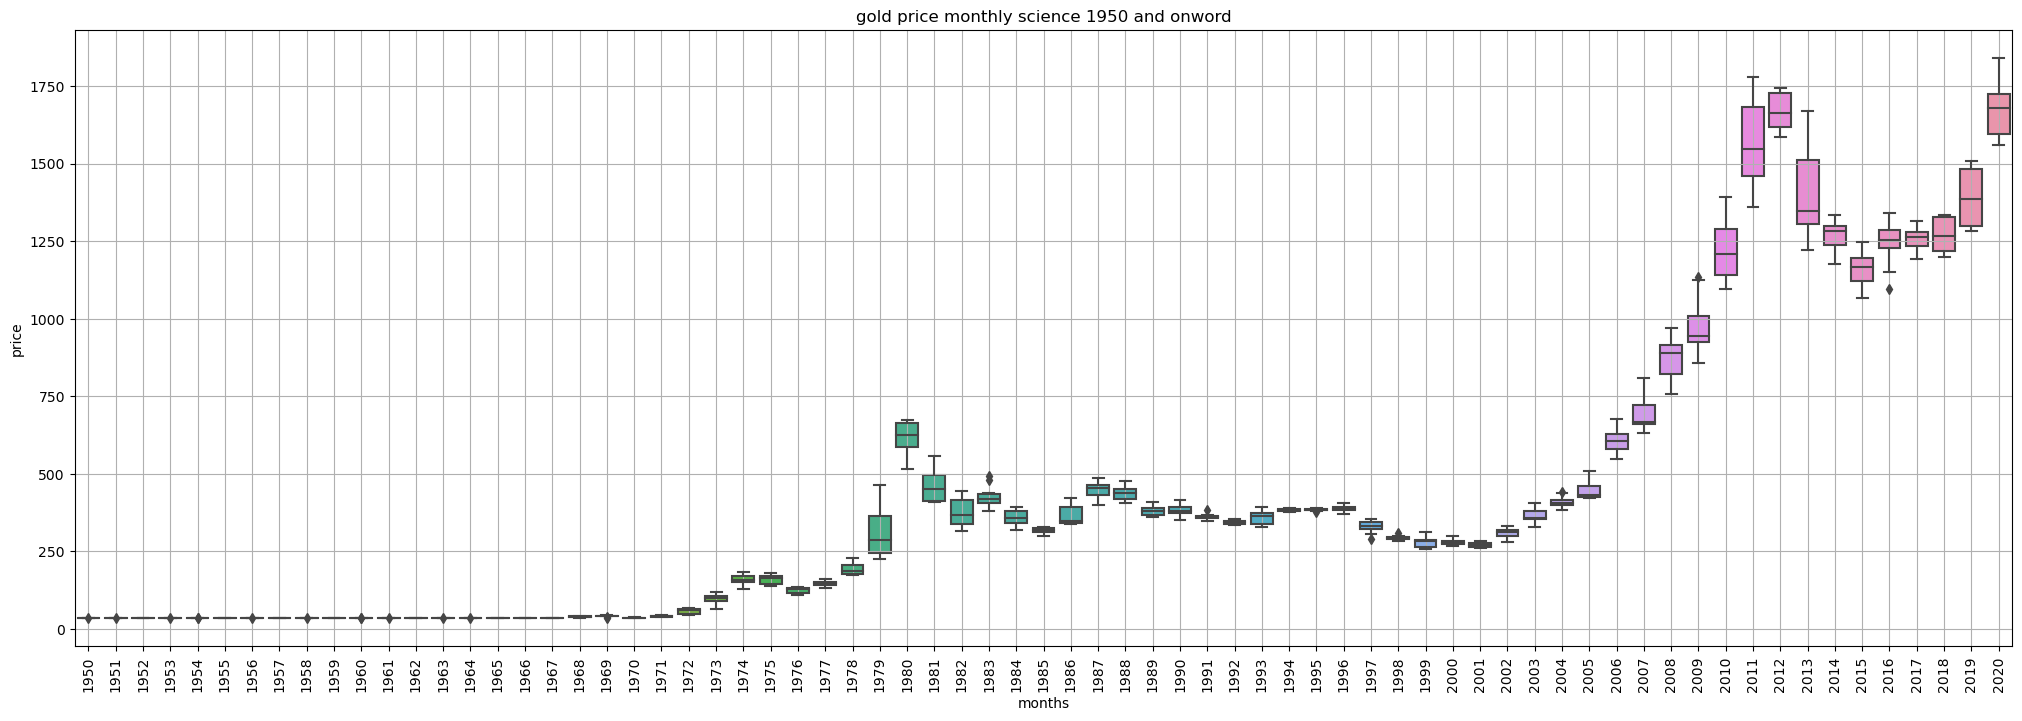

In [23]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)

plt.title("gold price monthly science 1950 and onword")
plt.xlabel("months")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid()

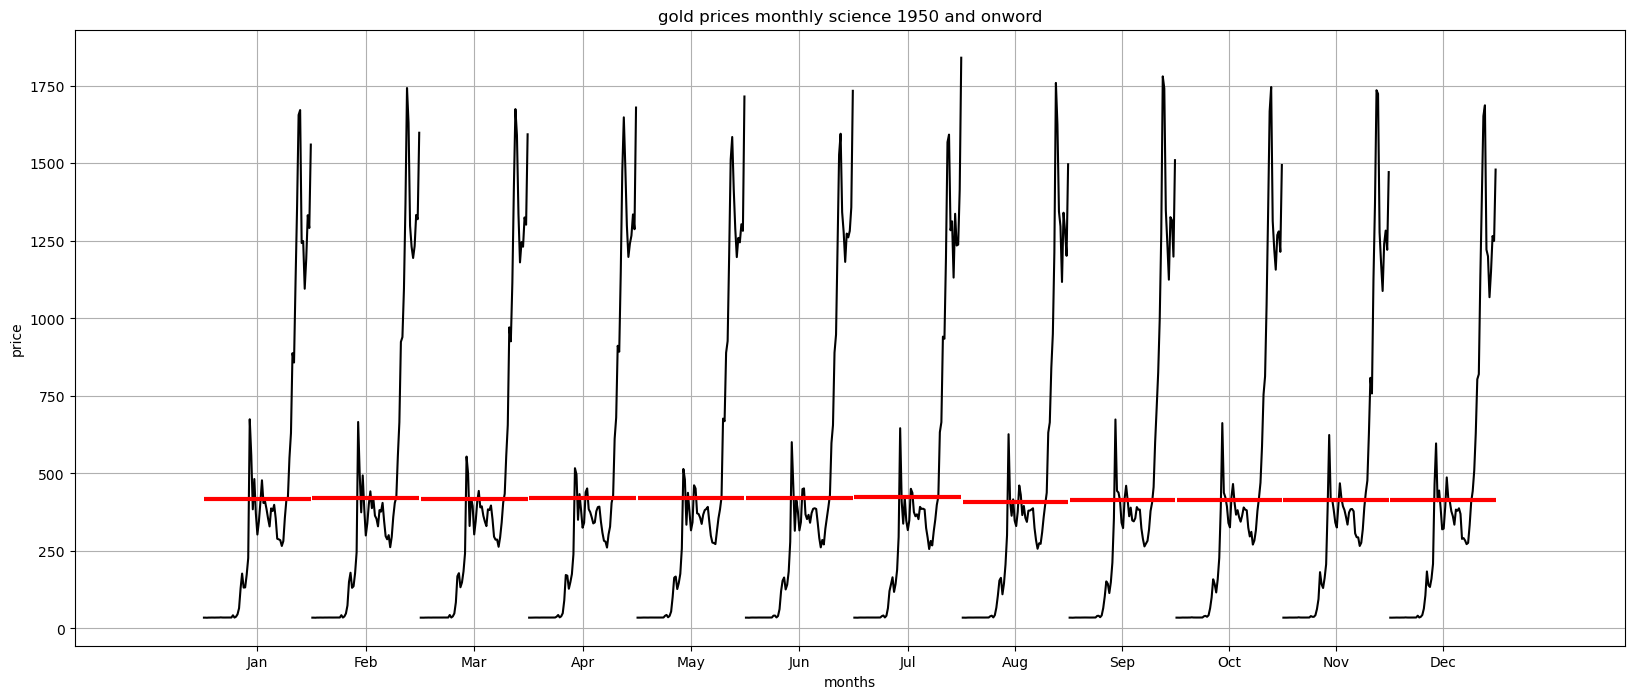

In [24]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax=plt.subplots(figsize=(20,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title("gold prices monthly science 1950 and onword")
plt.xlabel("months")
plt.ylabel("price")

plt.grid()

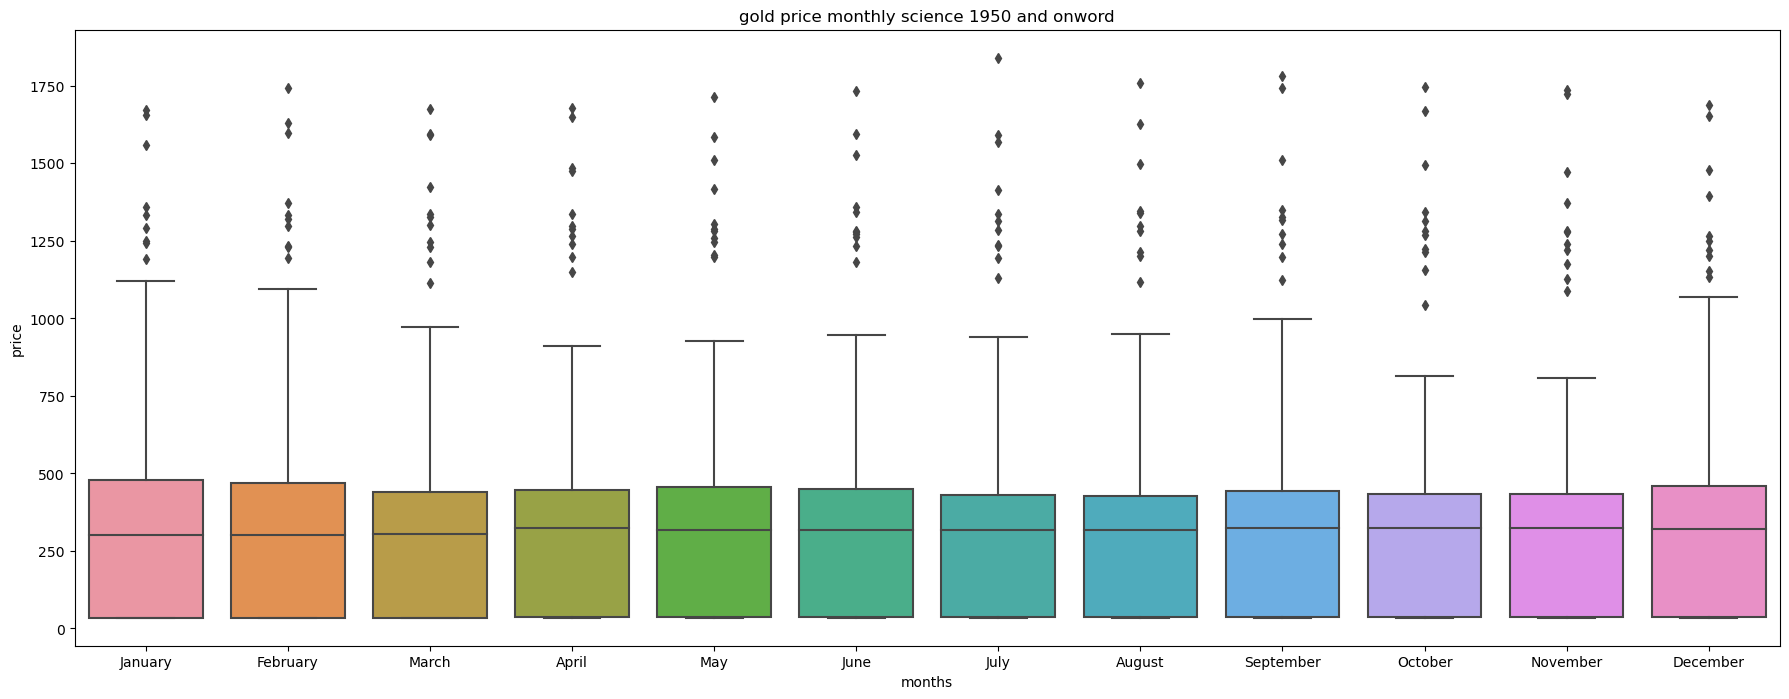

In [28]:
_,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title("gold price monthly science 1950 and onword")
plt.xlabel("months")
plt.ylabel("price")
plt.show()

Yearly price

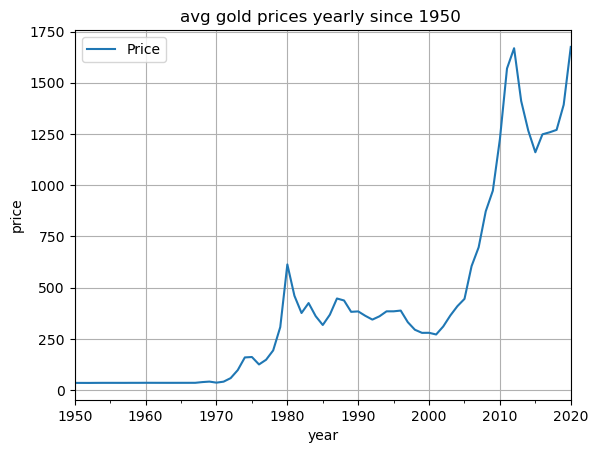

In [34]:
df_ye=df.resample("A").mean()
df_ye.plot()
plt.title("avg gold prices yearly since 1950 ")
plt.xlabel("year")
plt.ylabel("price")
plt.grid()

Qatar wise price

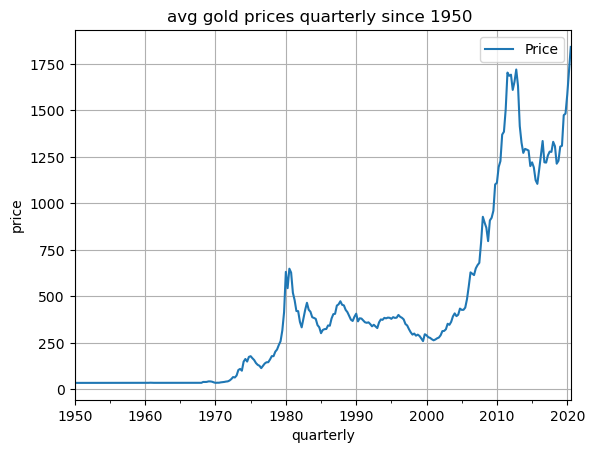

In [38]:
df_q=df.resample("Q").mean()
df_q.plot()
plt.title("avg gold prices quarterly since 1950 ")
plt.xlabel("quarterly")
plt.ylabel("price")
plt.grid()

In [ ]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("avg gold prices per decade since 1950 ")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()

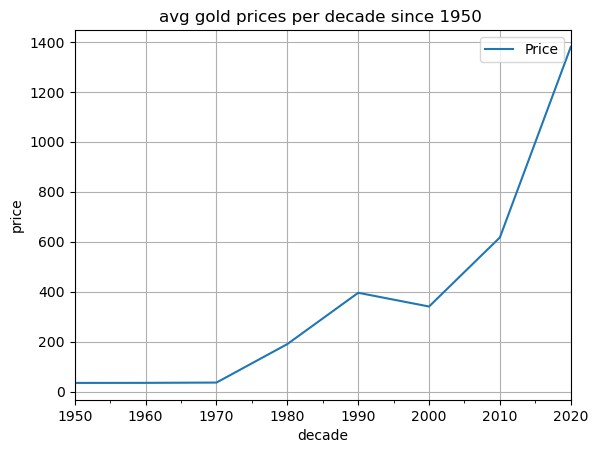

In [42]:
df_de=df.resample("10Y").mean()
df_de.plot()
plt.title("avg gold prices per decade since 1950 ")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()

In [43]:
df1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df1=df1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df1['cov_pct']=((df1['Std']/df1['Mean'])*100).round(2)
df1.head()

,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


In [44]:
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


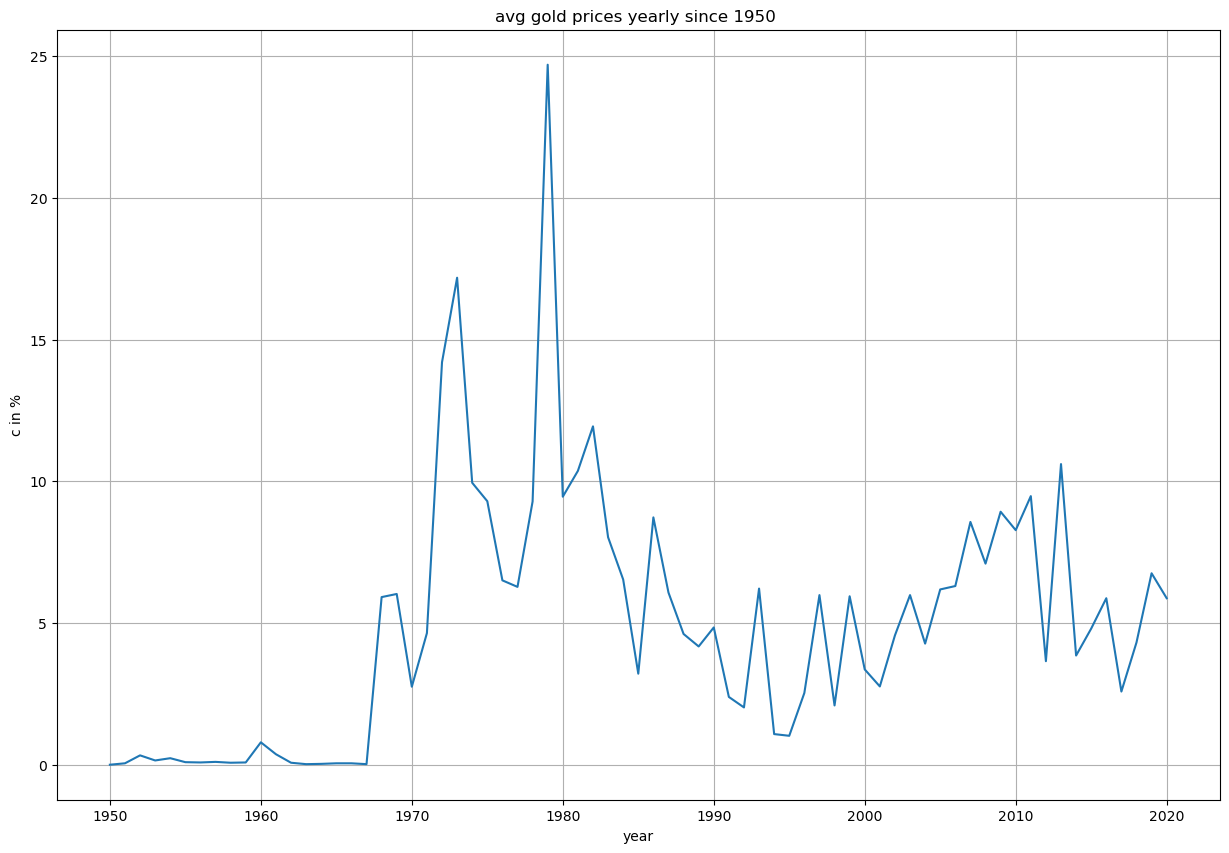

In [51]:
fig,ax=plt.subplots(figsize=(15,10))
df1['cov_pct'].plot()
plt.title("avg gold prices yearly since 1950 ")
plt.xlabel("year")
plt.ylabel("c in %")
plt.grid()

In [55]:
train=df[df.index.year <=2015]
test=df[df.index.year >2015]

In [56]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


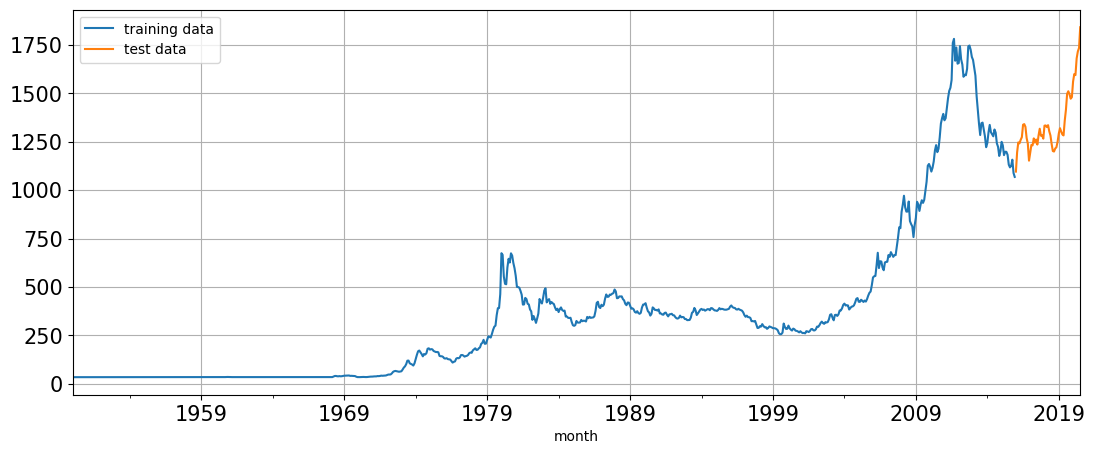

In [139]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['training data','test data'])
plt.show()

In [60]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [63]:
lr_train=train.copy()
lr_test=test.copy()

In [64]:
lr_train['time']=train_time
lr_test['time']=test_time

In [ ]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

In [67]:
lr=LinearRegression()
lr.fit(lr_train[['time']],lr_train['Price'].values)

LinearRegression()

In [ ]:
test_prediction_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid()

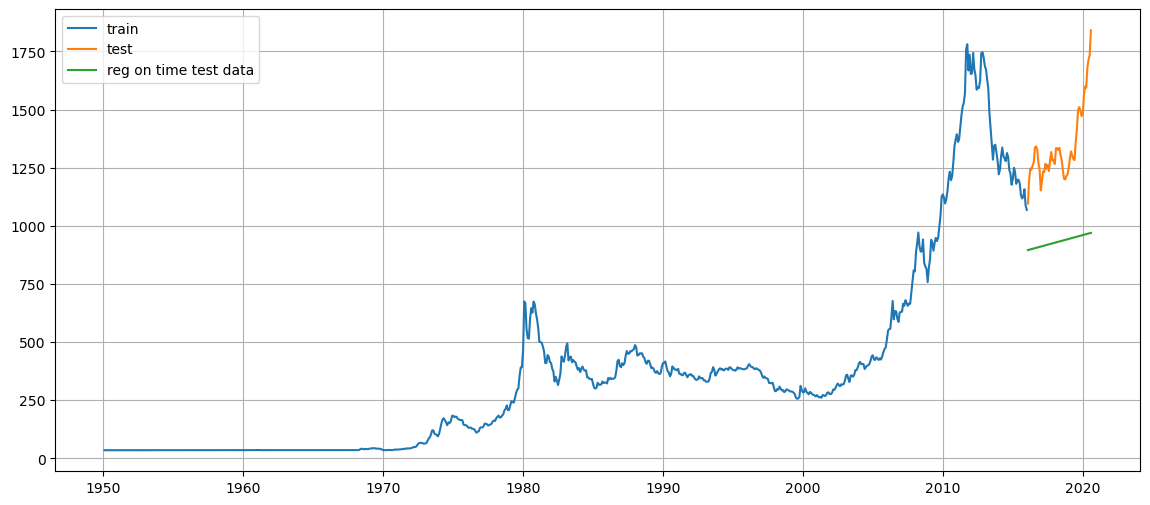

In [71]:
test_prediction_model1=lr.predict(lr_test[['time']])
lr_test['forecast']=test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(lr_test['forecast'],label='reg on time test data')
plt.legend(loc='best')
plt.grid()

In [72]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [73]:
map_model1_test=mape(test['Price'].values,test_prediction_model1)
print("mape is %3.3f"%(map_model1_test),"%")

mape is 29.760 %


In [74]:
results=pd.DataFrame({'test maps (%)':[map_model1_test]},index=['RegressionOntime'])
results

,test maps (%)
RegressionOntime,29.76


In [75]:
naive_train=train.copy()
naive_test=test.copy()

In [76]:
naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

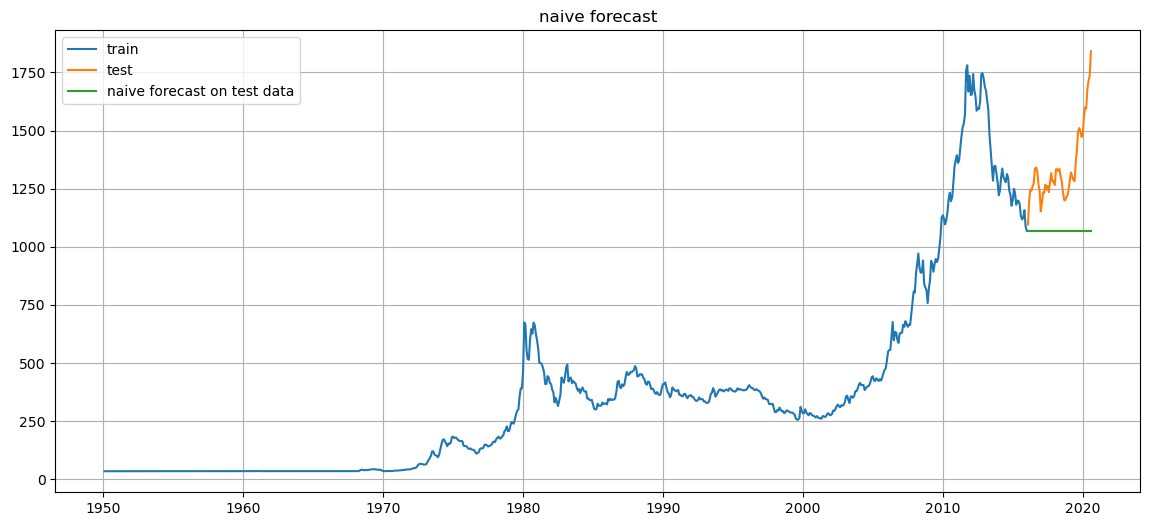

In [77]:
plt.figure(figsize=(14,6))
plt.plot(naive_train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(naive_test['naive'],label='naive forecast on test data')
plt.legend(loc='best')
plt.title("naive forecast")
plt.grid()

In [78]:
final_model=ExponentialSmoothing(df,
                                trend='additive',
                                seasonal='additive').fit(smoothing_level=0.4,
                                                        smoothing_trend=0.3,
                                                        smoothing_seasonal=0.6)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [79]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("MAPE:",Mape_final_model)

MAPE: 17.24


In [80]:
predictions=final_model.forecast(steps=len(test))

In [81]:
pred_df=pd.DataFrame({'lower_ci':predictions - 1.96%np.std(final_model.resid,ddof=1),
                     'prediction':predictions,
                     'upper_ci':predictions + 1.96%np.std(final_model.resid,ddof=1)})

In [82]:
pred_df.head()

,lower_ci,prediction,upper_ci
2020-08-31,1790.909246,1792.869246,1794.829246
2020-09-30,1721.492788,1723.452788,1725.412788
2020-10-31,1644.751851,1646.711851,1648.671851
2020-11-30,1582.939804,1584.899804,1586.859804
2020-12-31,1565.506182,1567.466182,1569.426182


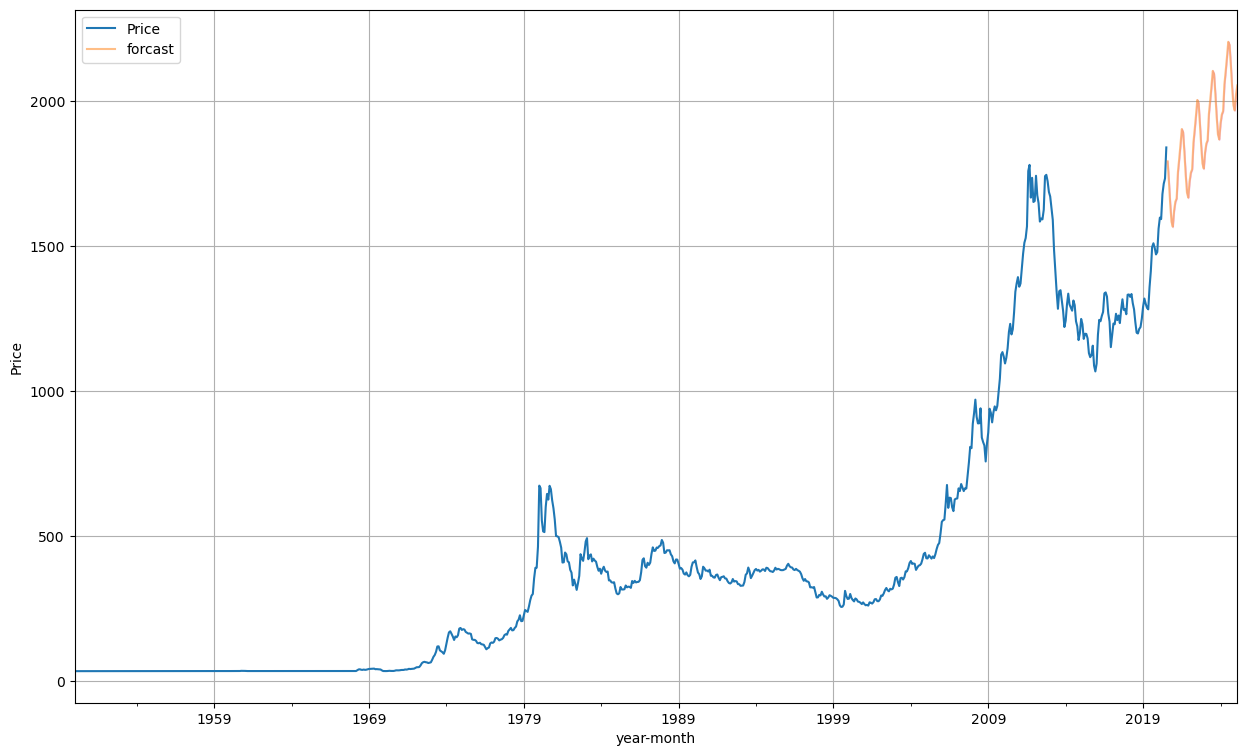

In [83]:
axis=df.plot(label='actual',figsize=(15,9))
pred_df['prediction'].plot(ax=axis,label='forcast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_ci'],pred_df['upper_ci'],color='m',alpha=.15)
axis.set_xlabel("year-month")
axis.set_ylabel("Price")
plt.legend(loc='best')
plt.grid()
plt.show()

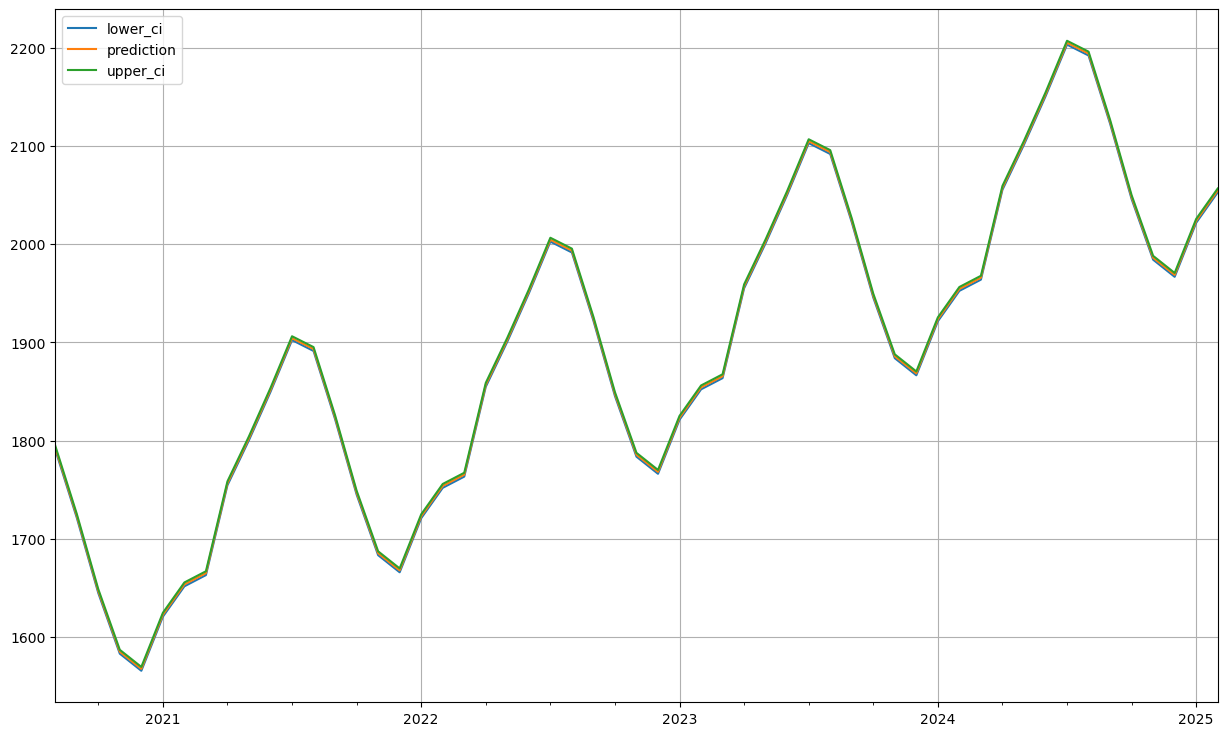

In [116]:
axis=pred_df.plot(label='actual',figsize=(15,9))
plt.grid()

In [122]:
pred=pred_df.drop(columns=['lower_ci'],axis=1)

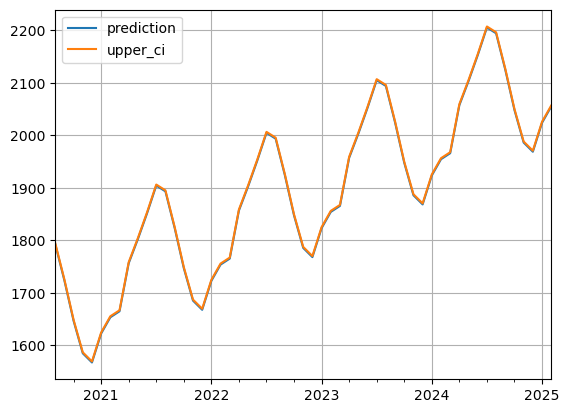

In [124]:
pred.plot()
plt.grid()

In [137]:
pred_df

,lower_ci,prediction,upper_ci
2020-08-31,1790.909246,1792.869246,1794.829246
2020-09-30,1721.492788,1723.452788,1725.412788
2020-10-31,1644.751851,1646.711851,1648.671851
2020-11-30,1582.939804,1584.899804,1586.859804
2020-12-31,1565.506182,1567.466182,1569.426182
2021-01-31,1620.594865,1622.554865,1624.514865
2021-02-28,1651.528839,1653.488839,1655.448839
2021-03-31,1662.940761,1664.900761,1666.860761
2021-04-30,1754.486701,1756.446701,1758.406701
2021-05-31,1800.403493,1802.363493,1804.323493
